In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

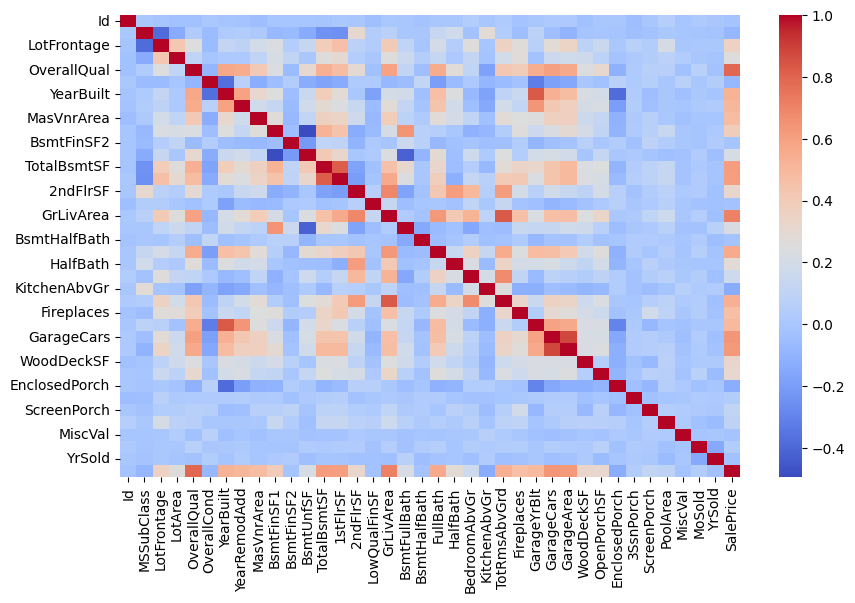

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(train.select_dtypes(include=["number"]).corr(), cmap="coolwarm", annot=False)
plt.show()


In [17]:
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
target = "SalePrice"

x = train[features]
y = train[target]

In [22]:
x = x.fillna(x.mean())

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")



MSE: 1414650359.893609, RMSE: 37611.838028652746, R-squared: 0.797272663802215


hasil = MSE: 1414650359.893609, RMSE: 37611.838028652746, R-squared: 0.797272663802215

penjelasan: MSE (Mean Squared Error) = 1,41 miliar

🔹 Nilai yang lebih rendah lebih baik, tetapi karena MSE dikuadratkan, sulit untuk diinterpretasikan secara langsung.

RMSE (Root Mean Squared Error) = 37.611

🔹 RMSE menggunakan satuan yang sama dengan harga rumah. Jika harga rumah rata-rata sekitar 180.000 - 200.000, maka RMSE ~37.000 berarti model memiliki rata-rata kesalahan prediksi sekitar ±37 juta rupiah.

R² (R-squared) = 0,797

🔹 Ini berarti model mampu menjelaskan ~80% variasi dalam harga rumah, yang merupakan awal yang cukup baik


kesimpulan hasil performa model saya: decent/biasa saja tetapi masih ada ruang untuk dikembangkan